In [34]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


First I imported the python package BeautifulSoup to use so I can scrape my data

In [35]:
opened_webpage = requests.get("http://statleaders.ufc.com/en/career")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


Then I create a new BeautifulSoup object and parse the webpage. 

In [36]:
column_names = ['Record','Rank', 'Name', 'Total'] 
raw_data = [] 
table = bs.find_all("div", {"class": "results-table--tr"})

for row in table:
    line = row.find_all("span")
    headers=row.find_previous('h3').text
    rank = line[0].text
    if rank == "Rnk":
        continue
    name = line[1].find_all("a")[0].text
    total = line[2].text
    final_data={}
    #for col in column_
    raw_data.append([headers,rank, name, total])
    



using BeautifulSoup's find_all method I extracted and stored all the data that I needed from the parsed html source. Then I iterated though each line of the extracted data and found and stored all my attributes into a list called raw_data. 

In [38]:
column_names = ['Type of Record', 'Rank', 'Name', 'Total']
final_data = pd.DataFrame(raw_data,columns = column_names)

final_data

,Type of Record,Rank,Name,Total
0,Total Fights,1,Jim Miller,41
1,Total Fights,2,Andrei Arlovski,39
2,Total Fights,3,Donald Cerrone,38
3,Total Fights,4,Clay Guida,34
4,Total Fights,4,Jeremy Stephens,34
...,...,...,...,...
340,Submission Avg. per 15 Min.,7,Tim Credeur,3.29
341,Submission Avg. per 15 Min.,8,Jason High,3.26
342,Submission Avg. per 15 Min.,9,Dave Menne,3.25
343,Submission Avg. per 15 Min.,10,Renato Sobral,3.16


I then created a list of of columns and created a new data frame called final_data using the raw_data and assigned the list of coulmn names as the columns for the data frame. 

In [39]:
def timecode_to_minutes(tc):
    parts = tc.split(":")
    if len(parts) == 2:
        return int(parts[0]) + int(parts[1])/60
    elif len(parts) == 3:
        return int(parts[0]) * 60 + int(parts[1]) + int(parts[2])/60
    else:
        raise ValueError("Invalid timecode format")

def clean_string_and_convert(s):
    if isinstance(s, float):
        return s
    if "%" in s:
        s = s.replace("%","")
        s = float(s)/100
    elif ":" in s:
        s = timecode_to_minutes(s)
    else:
        s = float(s)
    return round(s,2)




final_data["Rank"] = final_data["Rank"].astype(int)

final_data["Total"]=final_data["Total"].apply(clean_string_and_convert)





Once I had the final_data data frame I cleaned up the data a bit. All of my data that is intended to be numrical was orginally stored as string data-types so I had to convert them to floats. I turned percentages to decimals and used a function I created call timecode_to_minutes to convert the timecodes in my data to the amount of minutes in decimal form.

In [40]:
final_data

,Type of Record,Rank,Name,Total
0,Total Fights,1,Jim Miller,41.00
1,Total Fights,2,Andrei Arlovski,39.00
2,Total Fights,3,Donald Cerrone,38.00
3,Total Fights,4,Clay Guida,34.00
4,Total Fights,4,Jeremy Stephens,34.00
...,...,...,...,...
340,Submission Avg. per 15 Min.,7,Tim Credeur,3.29
341,Submission Avg. per 15 Min.,8,Jason High,3.26
342,Submission Avg. per 15 Min.,9,Dave Menne,3.25
343,Submission Avg. per 15 Min.,10,Renato Sobral,3.16


In [41]:
final_data.to_csv("ufc_carrer_records.csv")

In [ ]:
Fianlly I loaded my clean data into a csv file. 

In [42]:
ufc_career_df = pd.read_csv("ufc_carrer_records.csv")
ufc_career_df

,Unnamed: 0,Type of Record,Rank,Name,Total
0,0,Total Fights,1,Jim Miller,41.00
1,1,Total Fights,2,Andrei Arlovski,39.00
2,2,Total Fights,3,Donald Cerrone,38.00
3,3,Total Fights,4,Clay Guida,34.00
4,4,Total Fights,4,Jeremy Stephens,34.00
...,...,...,...,...,...
340,340,Submission Avg. per 15 Min.,7,Tim Credeur,3.29
341,341,Submission Avg. per 15 Min.,8,Jason High,3.26
342,342,Submission Avg. per 15 Min.,9,Dave Menne,3.25
343,343,Submission Avg. per 15 Min.,10,Renato Sobral,3.16


Once I had my csv file I read it in using panda and stored it in a varibale I named ufc_career_df.

In [43]:
names = {}
for name in ufc_career_df["Name"]:
    if name in names:
        names[name] += 1
    else:
        names[name] = 1
#print(names)

#filtering less common names out
min_freq=4
filtered_freq_names={}
for name in names:
    if names[name] >= min_freq:
        filtered_freq_names[name]=names[name]
        
    
print(filtered_freq_names)


{'Jim Miller': 7, 'Andrei Arlovski': 4, 'Donald Cerrone': 7, 'Clay Guida': 7, 'Jeremy Stephens': 4, 'Demian Maia': 8, 'Rafael Dos Anjos': 9, 'Charles Oliveira': 6, 'Frankie Edgar': 8, 'Dustin Poirier': 6, 'Michael Bisping': 4, 'Georges St-Pierre': 11, 'Jon Jones': 5, 'Anderson Silva': 6, 'Joe Lauzon': 4, 'Nate Diaz': 5, 'Darren Elkins': 4, 'Kamaru Usman': 5, 'Demetrious Johnson': 4, 'Max Holloway': 6, 'Matt Hughes': 4, 'Sergei Pavlovich': 4, 'Tom Aspinall': 6, 'Chael Sonnen': 4, 'Khamzat Chimaev': 5}


It was now time to analyze my data. To start I wanted to see how many records each fighter held. I did this by creating a dictionary by iterating though the names column in my data frame. This left me with a very big dictionary of key names and number of records values. I wasn't gonna be able to dislay this in a chart with all these names so I created a new dictionary called filtered_freq_names where the names were only added to the dicitonary if they had 4 or more records to their name. 

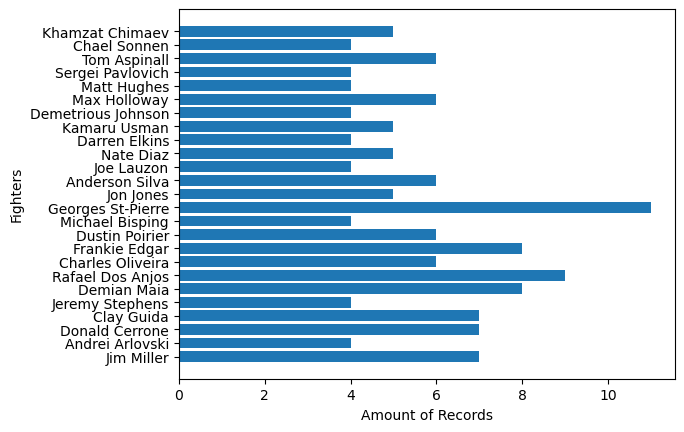

In [44]:
import matplotlib.pyplot as plt
# create a list of names and a list of frequencies
name_list = list(filtered_freq_names.keys())
freq_list = list(filtered_freq_names.values())

# create the bar chart
plt.barh(name_list, freq_list)
#plt.xticks(rotation=90) # rotate x-axis labels by 90 degrees
plt.xlabel('Amount of Records')
plt.ylabel('Fighters')

plt.show()

I then used the filtered_freq_names to display a bar chart of the amount of records each fighter has. Georges St Pierre surpasses all fighters with 11 career records to his name.

In [45]:
ufc_career_df.loc[ufc_career_df["Name"]=="Georges St-Pierre"]

,Unnamed: 0,Type of Record,Rank,Name,Total
18,18,Wins,8,Georges St-Pierre,20.00
58,58,Decision Wins,2,Georges St-Pierre,12.00
70,70,Win Streak,3,Georges St-Pierre,13.00
80,80,Title Fight Wins,2,Georges St-Pierre,13.00
136,136,Control Time,1,Georges St-Pierre,162.07
156,156,Top Position Time,1,Georges St-Pierre,142.08
263,263,Sig Strike Defense,2,Georges St-Pierre,0.73
283,283,Total Strikes Landed,2,Georges St-Pierre,2591.00
292,292,Takedowns Landed,1,Georges St-Pierre,90.00
304,304,Takedown Accuracy,3,Georges St-Pierre,0.74


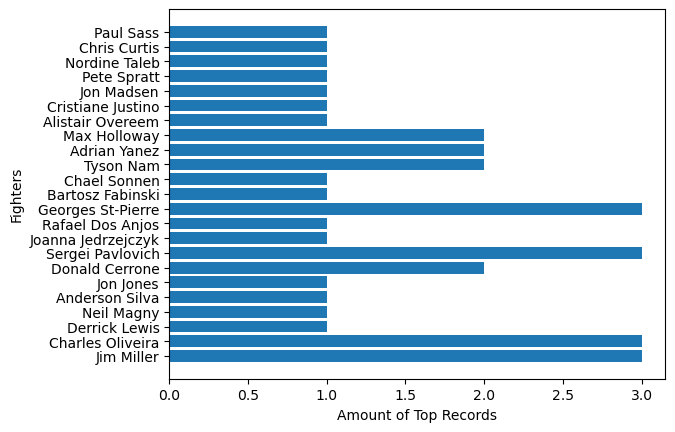

In [46]:
rank_1_fighters=ufc_career_df[ufc_career_df["Rank"]==1]["Name"]
rank_1_fighters_dict = {}
for name in rank_1_fighters:
    rank_1_fighters_dict.setdefault(name, 0)
    rank_1_fighters_dict[name] += 1
    

rank_1_name_list = list(rank_1_fighters_dict.keys())
rank_1_freq_list = list(rank_1_fighters_dict.values())

# create the bar chart
plt.barh(rank_1_name_list, rank_1_freq_list)
#plt.xticks(rotation=90) # rotate x-axis labels by 90 degrees
plt.xlabel('Amount of Top Records')
plt.ylabel('Fighters')

plt.show()
    

Then I wanted to see which fighter had the highest amount of all time records. To do this I created a dictionary called rank_1_fighters_dict and filled the keys the names of fighters who are ranked 1 in any record and the values as the amount of rank 1 records they have. Then I displayed the dcitionary as a bar chart. Georges St. Pierre, Sergie Pavlovich, Charles Oliveira, and Jim Miller all have 3 all time records. 

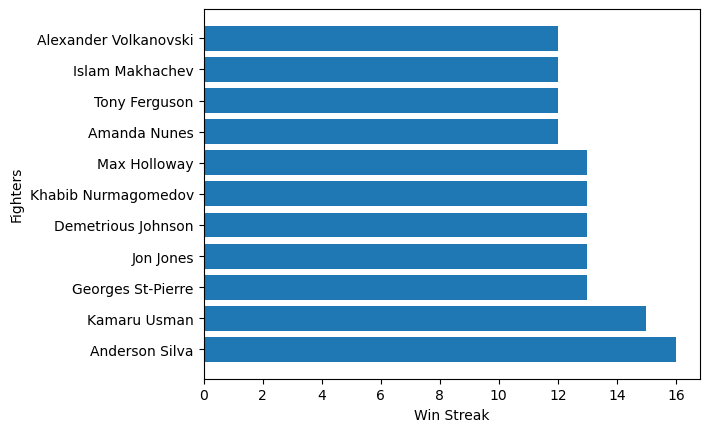

In [52]:
win_streak=ufc_career_df.loc[ufc_career_df["Type of Record"]=="Win Streak"]
win_streak_names=win_streak["Name"]
win_streak_values=win_streak["Total"]

# create the bar chart
plt.barh(win_streak_names, win_streak_values)
#plt.xticks(rotation=90) # rotate x-axis labels by 90 degrees
plt.xlabel('Win Streak')
plt.ylabel('Fighters')

plt.show()


Then I decided to look at which fighters had the highest win streaks in their UFC career. I did this by creating a data frame called win_streak that held the info for all the win streak records in ufc_career_df. Then made two other data frames one to store the names from win_streak and the other to store the values from win_streak. I used these two data frames to display another bar chart. Anderson Silva has the highest win streak in the UFC of all time with a win streak of 16. However, Kamaru Usman and Georges St. Pierre aren't far behind with a win streak of 15 and 13 respectively.

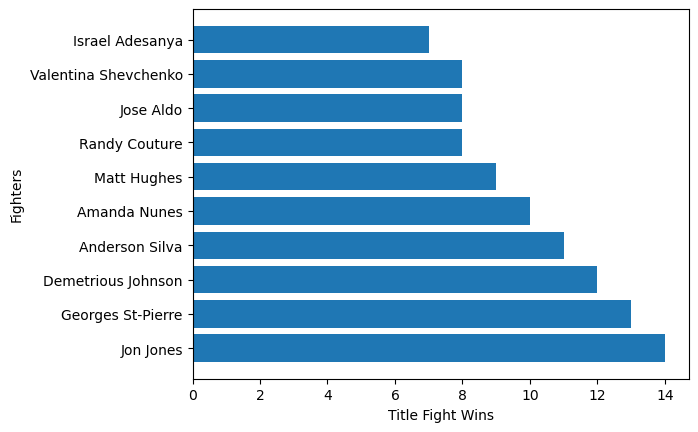

In [54]:
title_fight=ufc_career_df.loc[ufc_career_df["Type of Record"]=="Title Fight Wins"]
title_fight_names=title_fight["Name"]
title_fight_values=title_fight["Total"]

# create the bar chart
plt.barh(title_fight_names, title_fight_values)
#plt.xticks(rotation=90) # rotate x-axis labels by 90 degrees
plt.xlabel('Title Fight Wins')
plt.ylabel('Fighters')

plt.show()

Fianlly I wanted to see which fighters had the most title fight wins. So I created a new data frame called title_fight based on my oriinal ufc_career_df where I store only data where Type of Record is "Title Fight Wins". I create 2 new seperate data frames to store the names and amount of title fight wins from title_fight. Then I display the info with a bar chart. Jon Jones holds the most title fight wins coming in at 14 title fight wins. George St. Pierre isn't far behind ranked number 2 for title fight wins with 13 title fight wins. 